In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import imageio,io
import pydotplus

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

**Decision Tree**

In [ ]:
#Import data (already cleaned and modified for specific algorithm)
data = pd.read_csv('for_tree.csv')
data.head()

,job_ad_id,job_type,job_fed_contractor,job_ownership,job_req_communication,job_req_organization,received_callback,honors,worked_during_school,special_skills,volunteer,military,employment_holes,experience_delta,computer_match,school_match
0,384,2,0,4,0,0,0,0,0,0,0,0,1,1.0,1,2
1,384,2,0,4,0,0,0,0,1,0,1,1,0,1.0,1,2
2,384,2,0,4,0,0,0,0,1,0,0,0,0,1.0,1,2
3,384,2,0,4,0,0,0,0,0,1,1,0,1,1.0,1,2
4,385,3,0,3,0,1,0,0,1,0,0,0,0,22.0,1,2


In [ ]:
data.describe()

,job_ad_id,job_type,job_fed_contractor,job_ownership,job_req_communication,job_req_organization,received_callback,honors,worked_during_school,special_skills,volunteer,military,employment_holes,experience_delta,computer_match,school_match
count,5654.000000,5654.000000,5654.00000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000
mean,663.285462,3.552883,0.07393,2.457375,0.125221,0.068624,0.207994,0.060311,0.553060,0.353201,0.413159,0.094270,0.464804,7.363636,1.799611,1.953131
std,383.350322,1.611458,0.26168,1.395656,0.330999,0.252836,0.405909,0.238084,0.497221,0.478007,0.492444,0.292229,0.498804,5.215672,0.788871,0.240356
min,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,1.000000,1.000000
25%,327.000000,3.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000
50%,667.000000,3.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,2.000000
75%,983.000000,5.000000,0.00000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,9.000000,2.000000,2.000000
max,1344.000000,6.000000,1.00000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.000000,4.000000,3.000000


In [ ]:
#Split data into training and test datasets with 80/20 split
train, test = train_test_split(data, test_size = 0.20)

In [ ]:
#initialize decision tree
c = DecisionTreeClassifier(min_samples_split=100)

In [ ]:
#Create set of features with which to predict target
features = ['job_type',	'job_fed_contractor',	'job_ownership',	'job_req_communication',	'job_req_organization',	'honors',	'worked_during_school',	'special_skills',	'volunteer',	'military',	'employment_holes',	'experience_delta',	'computer_match',	'school_match']

In [ ]:
#Assign features and target to training sets
X_train = train[features]
y_train = train['received_callback']

#Assign features and target to testing sets
X_test = test[features]
y_test = test['received_callback']

In [ ]:
#Fit the decision tree to the training data
c.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=100)

In [ ]:
#Method to show tree 
def show_tree(tree, features, path):
  f = io.StringIO()
  export_graphviz(tree, out_file = f, feature_names = features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = imageio.imread(path)
  plt.rcParams['figure.figsize'] = (60, 60)
  plt.imshow(img)

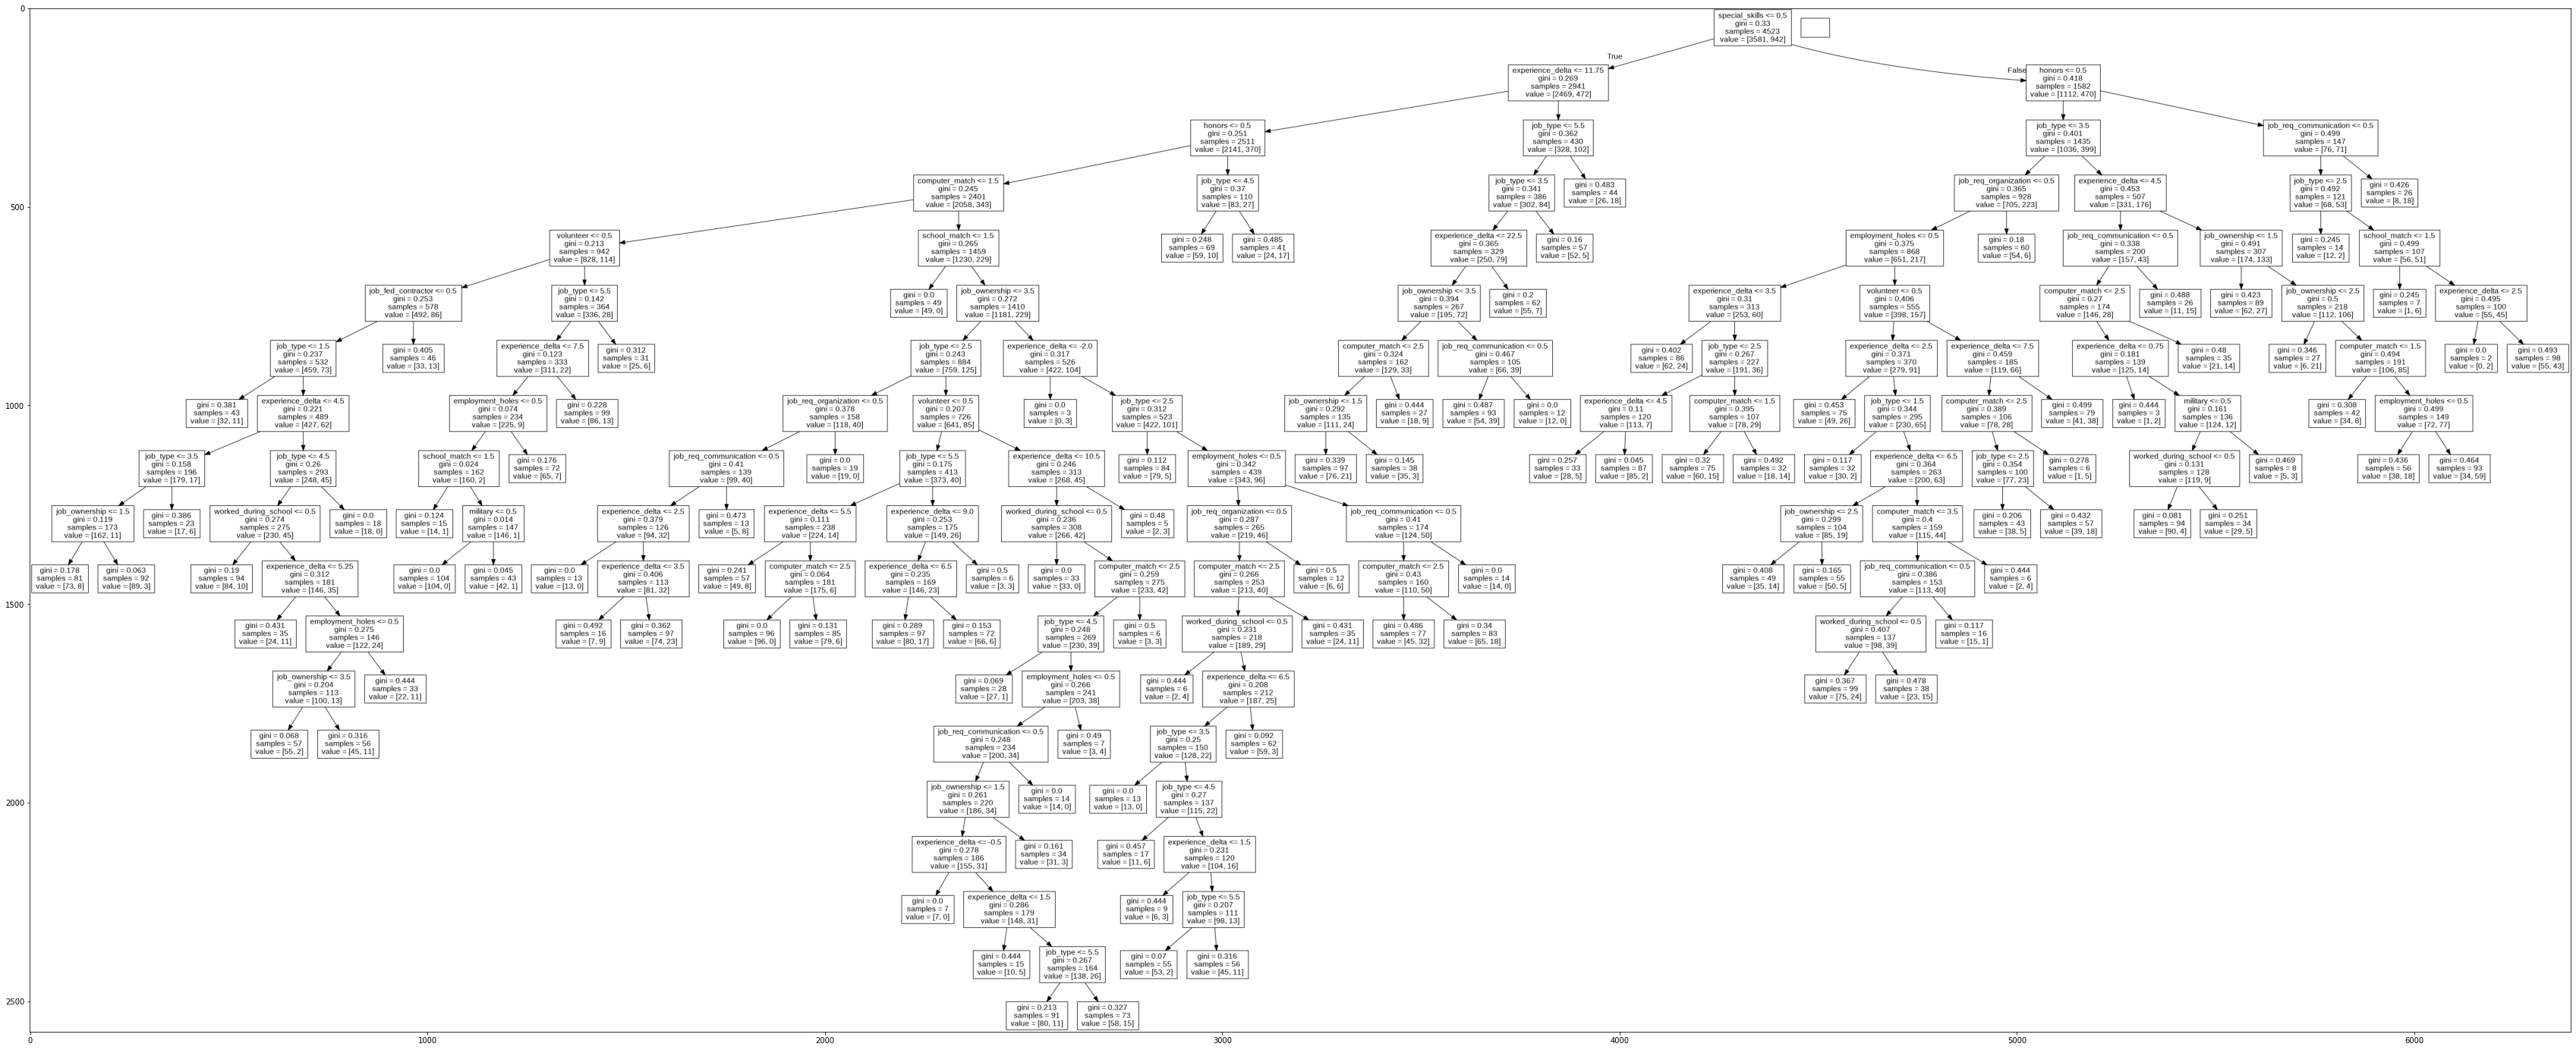

In [ ]:
#Display visual decision tree
show_tree(c,features,'decision_tree')

In [ ]:
#Use model to predict based on test features
y_pred = c.predict(X_test)
#Calculate metrics based on test predictions
a_score = accuracy_score(y_test, y_pred)*100
p_score = precision_score(y_test, y_pred)*100
r_score = recall_score(y_test, y_pred)*100
f_score = f1_score(y_test, y_pred)*100

In [ ]:
#Output metrics
print("Accuracy Using Decision Tree: ", a_score)
print('Precision Score', p_score)
print('Recall Score', r_score)
print('F1 Score', f_score)

Accuracy Using Decision Tree:  79.57559681697613
Precision Score 52.459016393442624
Recall Score 13.675213675213676
F1 Score 21.69491525423729


In [ ]:
#Used to test modified dataset against original dataset or to run predictions on the whole dataset
test_data = pd.read_csv('for_tree_test.csv')
x_test_2 = test_data[features]
y_test_2 = test_data['received_callback']
y_pred_2 = c.predict(x_test_2)
print("Accuracy Using Decision Tree: ", accuracy_score(y_test_2, y_pred_2))
print('Precision Score', precision_score(y_test_2, y_pred_2))
print('Recall Score', recall_score(y_test_2, y_pred_2))
print('F1 Score', f1_score(y_test_2, y_pred_2))

Accuracy Using Decision Tree:  0.9098562628336756
Precision Score 0.3672316384180791
Recall Score 0.16581632653061223
F1 Score 0.22847100175746923


In [ ]:
test_data.describe()

,job_ad_id,job_type,job_fed_contractor,job_ownership,job_req_communication,job_req_organization,received_callback,honors,worked_during_school,special_skills,volunteer,military,employment_holes,experience_delta,computer_match,school_match
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,651.777823,3.543326,0.073101,2.445175,0.124846,0.072690,0.080493,0.052772,0.559548,0.328747,0.411499,0.097125,0.448049,7.208419,1.787885,1.951745
std,388.690698,1.620517,0.260328,1.393502,0.330578,0.259654,0.272083,0.223601,0.496492,0.469806,0.492156,0.296159,0.497345,5.125203,0.785717,0.245585
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,1.000000,1.000000
25%,306.250000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000
50%,647.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,2.000000
75%,979.750000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,8.000000,2.000000,2.000000
max,1344.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.000000,4.000000,3.000000
